In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
main_dir = './New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
pwd

'/content'

In [ ]:
ls

 cifar10.ipynb                        data/                    Untitled0.ipynb
'Copy of Copy of Untitled0.ipynb'    'New Masks Dataset'/      Untitled1.ipynb
'Copy of Dimension_Reduction.ipynb'   price_paid_records.csv   Untitled2.ipynb
'Copy of Untitled0.ipynb'            'Uk timeseries1.ipynb'


In [ ]:
cd ..

/content/drive/My Drive/Colab Notebooks


In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

print()

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0003.jpg', '0006.jpg', '0063.jpg', '0019.jpg', '0048.jpg', '0113.jpg', '0040.jpg', '0042.jpg', '0027.jpg', '0037.jpg']

['112.jpg', '115.jpg', '100.jpg', '118.jpg', '101.jpg', '117.jpg', '108.jpg', '114.jpg', '104.jpg', '116.jpg']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['./New Masks Dataset/Train/Mask/0003.jpg', './New Masks Dataset/Train/Mask/0006.jpg', './New Masks Dataset/Train/Mask/0063.jpg', './New Masks Dataset/Train/Mask/0019.jpg', './New Masks Dataset/Train/Mask/0048.jpg', './New Masks Dataset/Train/Mask/0113.jpg', './New Masks Dataset/Train/Mask/0040.jpg', './New Masks Dataset/Train/Mask/0042.jpg']

['./New Masks Dataset/Train/Non Mask/112.jpg', './New Masks Dataset/Train/Non Mask/115.jpg', './New Masks Dataset/Train/Non Mask/100.jpg', './New Masks Dataset/Train/Non Mask/118.jpg', './New Masks Dataset/Train/Non Mask/101.jpg', './New Masks Dataset/Train/Non Mask/117.jpg', './New Masks Dataset/Train/Non Mask/108.jpg', './New Masks Dataset/Train/Non Mask/114.jpg']


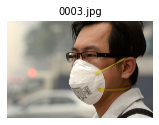

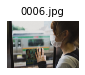

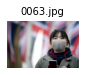

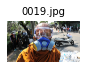

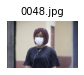

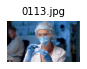

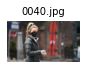

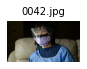

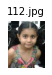

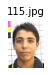

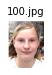

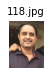

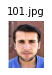

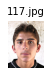

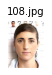

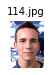

In [ ]:
nrows = 4
ncols = 4

plt.figure(figsize=(12,12))

mask_pic =[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic= []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))  

print(mask_pic)
print()
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = plt.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
  
  plt.show()
#In [ ]:
#train_datagen = Imag

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip =True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64,64),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(64,64),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(64,64),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(64, 64, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),padding='SAME',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4194560   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 398s 20s/step - loss: 0.7420 - accuracy: 0.5476 - val_loss: 0.3688 - val_accuracy: 0.8824
Epoch 2/30
19/19 [==============================] - 11s 575ms/step - loss: 0.3965 - accuracy: 0.8469 - val_loss: 0.2771 - val_accuracy: 0.8987
Epoch 3/30
19/19 [==============================] - 10s 565ms/step - loss: 0.3243 - accuracy: 0.8905 - val_loss: 0.2484 - val_accuracy: 0.8987
Epoch 4/30
19/19 [==============================] - 10s 563ms/step - loss: 0.3016 - accuracy: 0.8909 - val_loss: 0.2316 - val_accuracy: 0.9150
Epoch 5/30
19/19 [==============================] - 11s 578ms/step - loss: 0.2030 - accuracy: 0.9264 - val_loss: 0.2762 - val_accuracy: 0.8824
Epoch 6/30
19/19 [==============================] - 11s 568ms/step - loss: 0.2578 - accuracy: 0.9169 - val_loss: 0.2995 - val_accuracy: 0.8693
Epoch 7/30
19/19 [==============================] - 10s 560ms/step - loss: 0.2805 - accuracy: 0.8915 - val_loss: 0.2628 - val_accuracy: 0.8954


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

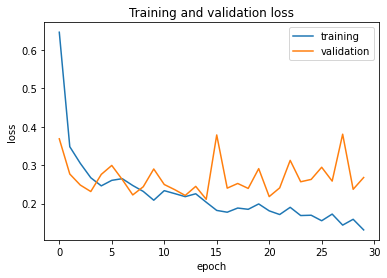

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

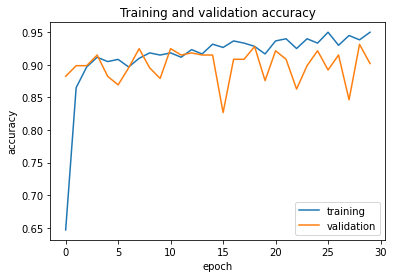

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 35s 12s/step - loss: 0.1322 - accuracy: 0.9500
test loss:0.1322467178106308 test acc:0.949999988079071
